# ===============================
# Data Mining - Gender Classification (Kelompok 1)
# ===============================

#Data Understanding

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, RocCurveDisplay

In [ ]:
# Load Dataset
df = pd.read_csv('/content/gender_classification_v7.csv')
print("Shape:", df.shape)
df

Shape: (5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
# Struktur data
print("\n=== INFO DATA ===")
print(df.info())


=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None


In [ ]:
# Statistik deskriptif
print("\nDeskripsi Statistik:")
print(df.describe())


Deskripsi Statistik:
         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%   

In [ ]:
# cek missing value
print("\nCek Missing Value:")
print(df.isnull().sum())


Cek Missing Value:
long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64



Distribusi Target:
gender
Female    2501
Male      2500
Name: count, dtype: int64


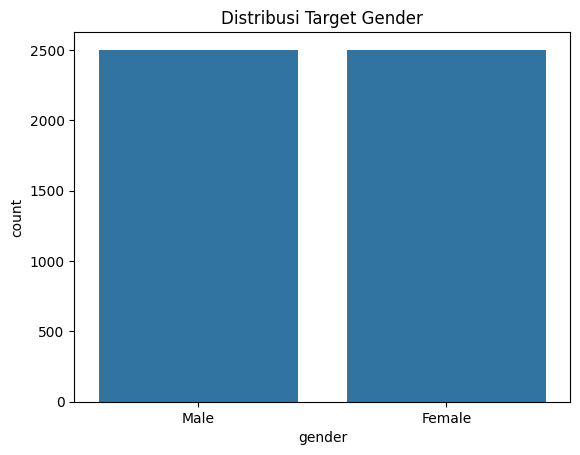

In [ ]:
# Distribusi Target
if 'gender' in df.columns:
    target_col = 'gender'
else:
    target_col = df.columns[-1]

print("\nDistribusi Target:")
print(df[target_col].value_counts())

sns.countplot(x=df[target_col])
plt.title("Distribusi Target Gender")
plt.show()

# Data preprocessing

In [ ]:
# Tampilkan data duplikat sebelum dihapus
print("\nData Duplikat Sebelum Dihapus:")
display(df[df.duplicated(keep=False)])


Data Duplikat Sebelum Dihapus:


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
2,0,11.8,6.3,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
9,1,12.1,5.4,0,0,0,0,Female
11,1,15.5,5.8,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
# Hapus data duplikat
df = df.drop_duplicates()
print("\nDuplikat dihapus. Data sekarang:", df.shape)


Duplikat dihapus. Data sekarang: (3233, 8)


In [ ]:
# Encoding target object
if df[target_col].dtype == 'object':
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])

/tmp/ipython-input-244032005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = le.fit_transform(df[target_col])


In [ ]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


In [ ]:
# Pemisahan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# hasil pemisahan
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3233, 7)
Shape of y: (3233,)


In [ ]:
# Cek missing value setelah pemisahan
print("\nCek Missing Value di X:")
print(X.isnull().sum())
print("\nCek Missing Value di y:")
print(y.isnull().sum())


Cek Missing Value di X:
long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
dtype: int64

Cek Missing Value di y:
0


In [ ]:
# Penanganan missing value
X = X.fillna(X.median())

In [ ]:
#hasil penanganan missing value
print("\nInfo data setelah penanganan missing value:")
print(X.info())


Info data setelah penanganan missing value:
<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 202.1 KB
None


In [ ]:
# Normalisasi numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# hasil normalisasi
print("\nData setelah Normalisasi Numerik (X_scaled):")
display(pd.DataFrame(X_scaled, columns=X.columns).head())


Data setelah Normalisasi Numerik (X_scaled):


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.464619,-1.270095,0.243699,0.929772,-1.122871,0.925731,0.913130
1,-2.152302,0.701549,-1.029713,-1.075533,-1.122871,0.925731,-1.095135
2,-2.152302,-1.270095,0.607531,0.929772,0.890574,0.925731,0.913130
3,-2.152302,1.060029,0.243699,-1.075533,0.890574,0.925731,0.913130
4,0.464619,0.253448,-0.120133,-1.075533,-1.122871,-1.080227,-1.095135


In [ ]:
 # Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("\nData training:", X_train.shape, " | Data testing:", X_test.shape)


Data training: (2586, 7)  | Data testing: (647, 7)


# Feature Selection

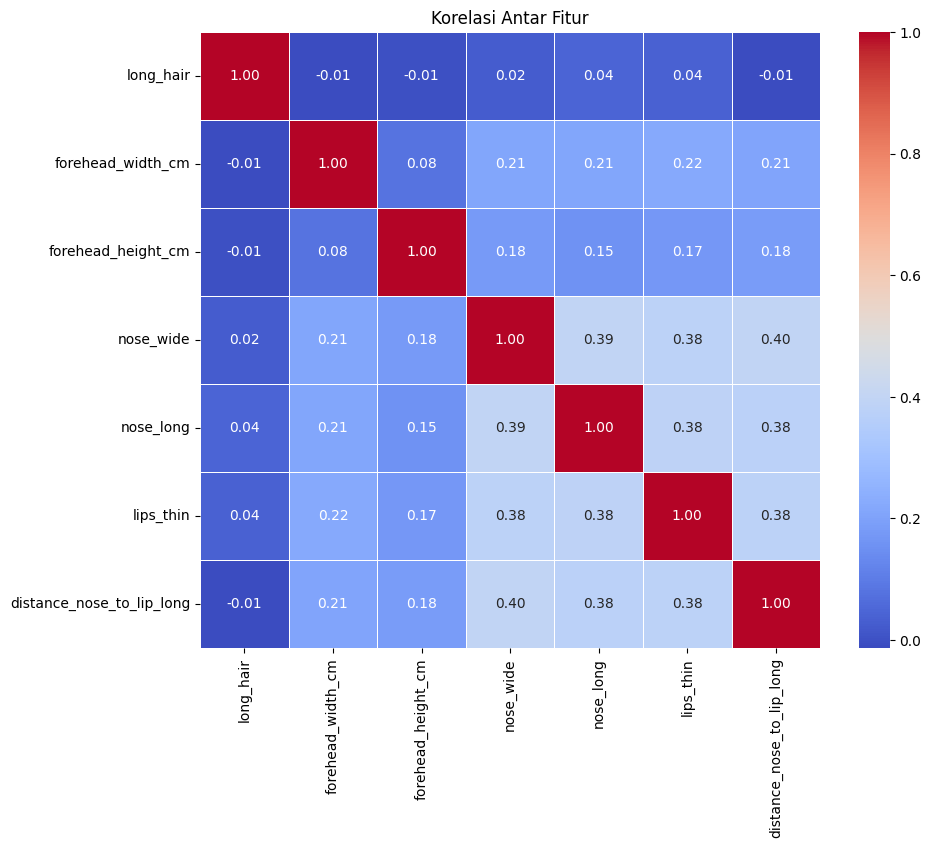

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Korelasi Antar Fitur")
plt.show()

In [ ]:
# Feature Selection
fs = SelectKBest(score_func=f_classif, k=min(10, X_train.shape[1]))
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)
selected_features = np.array(X.columns)[fs.get_support()]
print("\nFitur Terpilih :", list(selected_features))


Fitur Terpilih : ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


# Modeling


=== KNN ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       290
           1       0.95      0.96      0.96       357

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



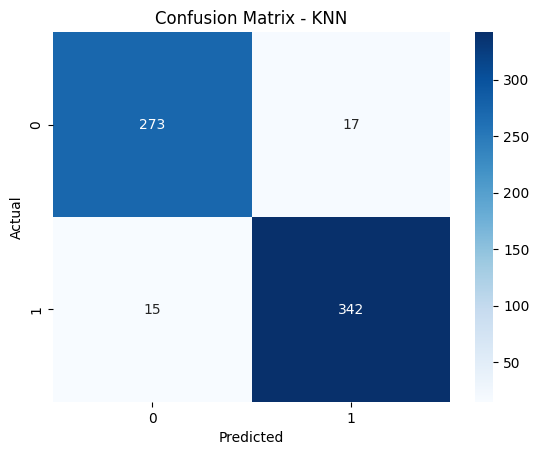


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       290
           1       0.95      0.97      0.96       357

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



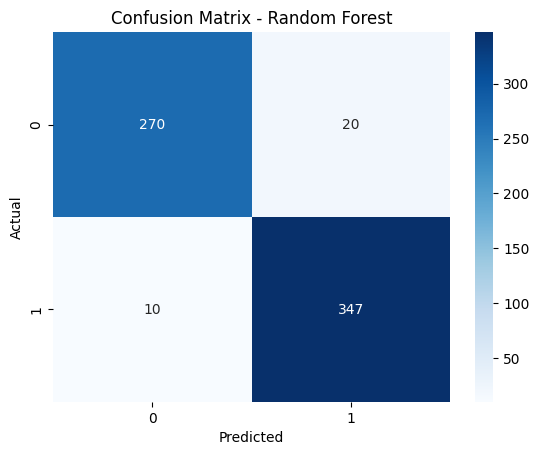


=== SVM ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       290
           1       0.96      0.97      0.96       357

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



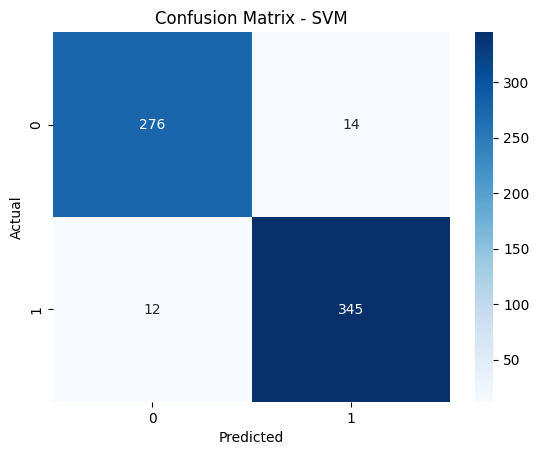

In [ ]:
# Modeling
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_test_fs)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



# Evaluation & Visualization


=== HASIL PERBANDINGAN MODEL ===
           Model  Accuracy  Precision    Recall        F1
2            SVM  0.959815   0.961003  0.966387  0.963687
1  Random Forest  0.953632   0.945504  0.971989  0.958564
0            KNN  0.950541   0.952646  0.957983  0.955307


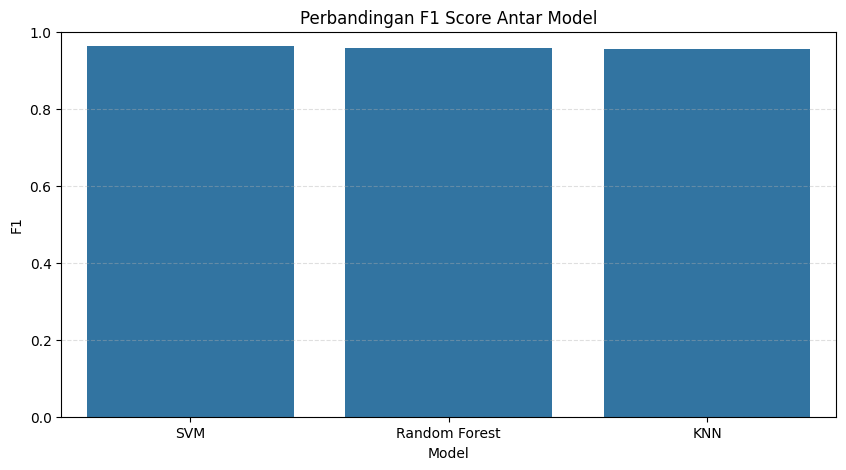

In [ ]:
# Evaluation & Visualization
res_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
res_df = res_df.sort_values(by='F1', ascending=False)
print("\n=== HASIL PERBANDINGAN MODEL ===")
print(res_df)

plt.figure(figsize=(10,5))
sns.barplot(data=res_df, x='Model', y='F1')
plt.title("Perbandingan F1 Score Antar Model")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

<Figure size 800x600 with 0 Axes>

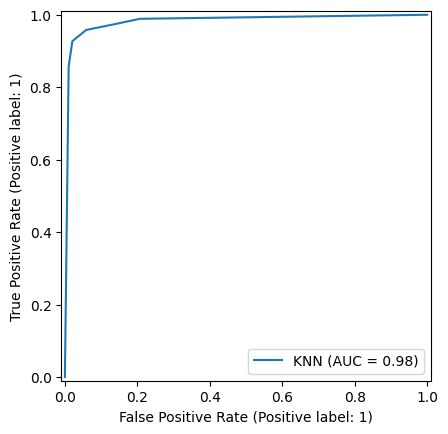

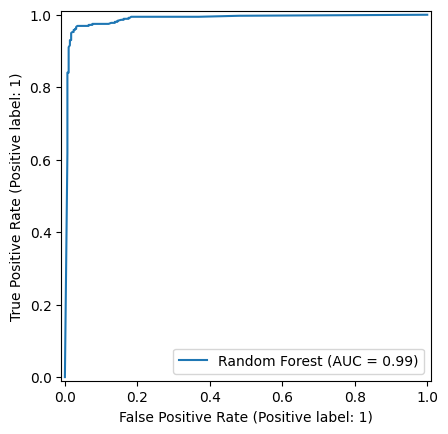

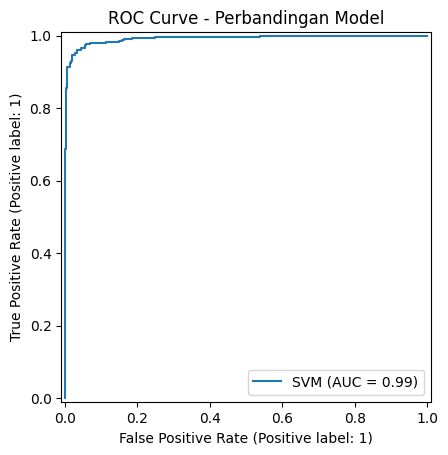

In [ ]:
# ROC Curve (jika target biner)
if len(np.unique(y)) == 2:
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            RocCurveDisplay.from_estimator(model, X_test_fs, y_test, name=name)
    plt.title("ROC Curve - Perbandingan Model")
    plt.show()

#Analisis dan Interpretasi

In [ ]:
# Analisis dan Interpretasi
print("\n=== ANALISIS ===")
best_model = res_df.iloc[0]['Model']
print(f"Model terbaik berdasarkan F1-score: {best_model}")
print("Perbedaan performa bisa disebabkan oleh:")
print("- Kompleksitas model dan kemampuan menangkap pola non-linear")
print("- Sensitivitas terhadap scaling fitur (contohnya KNN dan SVM)")
print("- Random Forest biasanya unggul karena mampu menangani outlier dan interaksi fitur")


=== ANALISIS ===
Model terbaik berdasarkan F1-score: SVM
Perbedaan performa bisa disebabkan oleh:
- Kompleksitas model dan kemampuan menangkap pola non-linear
- Sensitivitas terhadap scaling fitur (contohnya KNN dan SVM)
- Random Forest biasanya unggul karena mampu menangani outlier dan interaksi fitur


In [ ]:
# === Inference Helper ===
# Ambil nama model terbaik dari tabel hasil (pakai F1 tertinggi)
use_model_name = res_df.iloc[0]['Model']
best_clf = models[use_model_name]   # sudah ter-fit di atas
print("Model yang dipakai untuk prediksi:", use_model_name)

# Simpan artefak penting untuk inference
feature_columns = list(X.columns)     # urutan kolom asli sebelum scaling/FS
medians = pd.Series(X.median(), index=feature_columns)  # untuk imputasi konsisten

def predict_new(samples):
    """
    samples:
      - dict satu data, misal {"height":170, "weight":60, ...}
      - atau list of dict untuk batch
      - atau DataFrame dengan kolom sama seperti feature_columns (boleh subset, sisanya diimpute)
    return: DataFrame berisi prediksi & (jika ada) probabilitas
    """
    # normalisasi input menjadi DataFrame
    if isinstance(samples, dict):
        df_new = pd.DataFrame([samples])
    elif isinstance(samples, list):
        df_new = pd.DataFrame(samples)
    else:
        df_new = samples.copy()

    # pastikan semua kolom fitur ada, urutkan sesuai training
    for col in feature_columns:
        if col not in df_new.columns:
            df_new[col] = np.nan
    df_new = df_new[feature_columns]

    # imputasi dengan median training
    df_new = df_new.fillna(medians)

    # scaling dengan scaler yang sudah fit
    X_new_scaled = scaler.transform(df_new)

    # seleksi fitur sama seperti training
    X_new_fs = fs.transform(X_new_scaled)

    # prediksi
    y_pred = best_clf.predict(X_new_fs)

    # probabilitas (kalau classifier mendukung)
    out = pd.DataFrame({"prediction": y_pred})
    if hasattr(best_clf, "predict_proba"):
        proba = best_clf.predict_proba(X_new_fs)
        if proba.shape[1] == 2:
            out["proba_class_1"] = proba[:, 1]
        else:
            # multi-class: tambahkan kolom untuk tiap kelas
            for i in range(proba.shape[1]):
                out[f"proba_class_{i}"] = proba[:, i]
    return out


Model yang dipakai untuk prediksi: SVM


#Deployment

In [ ]:
# Jalankan ini sekali untuk aktifkan interaktif mode
!pip install ipywidgets --quiet
from ipywidgets import interact, FloatText, IntSlider, Dropdown, Button, VBox, HBox, Output
from IPython.display import display, clear_output

# Siapkan UI dinamis berdasarkan kolom fitur
feature_inputs = {}
for col in feature_columns:
    if X[col].dtype in [int, float]:
        # slider angka
        val = float(medians[col])
        feature_inputs[col] = FloatText(value=val, description=col)
    else:
        # dropdown untuk kategori (kalau ada)
        uniques = df[col].unique().tolist()
        feature_inputs[col] = Dropdown(options=uniques, description=col)

# Tombol & output
predict_button = Button(description="Predict Gender", button_style='success')
output = Output()

def on_predict_clicked(b):
    with output:
        clear_output()
        sample = {k: w.value for k, w in feature_inputs.items()}
        pred = predict_new(sample)
        print("Input:", sample)
        print("Hasil Prediksi:", pred['prediction'].iloc[0])
        if 'proba_class_1' in pred.columns:
            print("Probabilitas class 1 (mis. Male):", round(pred['proba_class_1'].iloc[0], 3))

predict_button.on_click(on_predict_clicked)

ui = VBox(list(feature_inputs.values()) + [predict_button, output])
display(ui)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
